In [1]:
## Initialization and imports
import pandas as pd 
import numpy as np
from math import pi

## Changing directory to top folder (All programs run from top)
import os
os.chdir('/Users/nschumacher/docs/galvanize/smunch-user-food-analysis')

from clustering.cluster_post_prep import *

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

## Plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='noahschumacher', api_key='IIUnPL7kfY6cnZtC3e7g')
plotly.offline.init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'

## Set random seed
np.random.seed(seed=14)

In [2]:
top_ing_f = get_df()
top_ing_f.describe()

,savory sauce,spice,meat,veg,sweet sauce,alc,herb,pork,grain,sauce,...,sour,wheat,octopus,falafel,noodle,hummus,paste,df cream,salmon,df cheese
count,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,...,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03,7.149000e+03
mean,-1.342815e-14,-1.731072e-14,1.902591e-15,-2.349495e-14,-5.500954e-15,-5.261174e-16,-1.658803e-14,-5.490083e-15,-1.490454e-15,7.476775e-15,...,-7.249016e-15,6.826885e-16,-2.829617e-15,7.802559e-15,8.659087e-16,1.225679e-15,4.591861e-16,1.911375e-15,-2.957399e-15,-1.257263e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.066157e+00,-3.290784e+00,-1.686816e-01,-5.404023e+00,-1.146790e+00,-8.549276e-01,-2.615510e+00,-7.831421e-01,-1.291732e+00,-5.154653e-01,...,-6.794980e-01,-4.588338e-01,-1.889212e-01,-8.081316e-01,-3.784343e-01,-4.334627e-02,-3.149303e-02,-4.917210e-02,-7.258018e-02,-1.061489e-01
25%,-6.461809e-01,-5.548546e-01,-1.686816e-01,-5.945165e-01,-6.416588e-01,-8.549276e-01,-5.712972e-01,-7.831421e-01,-7.065414e-01,-5.154653e-01,...,-6.794980e-01,-4.588338e-01,-1.889212e-01,-8.081316e-01,-3.784343e-01,-4.334627e-02,-3.149303e-02,-4.917210e-02,-7.258018e-02,-1.061489e-01
50%,-1.338106e-01,-1.094525e-02,-1.686816e-01,2.789026e-02,-1.283803e-01,-2.145408e-01,-2.493483e-02,-3.248208e-01,-8.522759e-02,-5.154653e-01,...,-3.080171e-01,-4.588338e-01,-1.889212e-01,-2.737772e-01,-3.784343e-01,-4.334627e-02,-3.149303e-02,-4.917210e-02,-7.258018e-02,-1.061489e-01
75%,4.121577e-01,5.690063e-01,-1.686816e-01,6.254007e-01,4.826655e-01,4.258461e-01,5.437281e-01,4.645102e-01,5.144124e-01,1.977189e-01,...,3.482657e-01,1.151604e-01,-1.889212e-01,4.505699e-01,-1.791164e-01,-4.334627e-02,-3.149303e-02,-4.917210e-02,-7.258018e-02,-1.061489e-01
max,9.433234e+00,5.719762e+00,2.498972e+01,5.114651e+00,8.629943e+00,8.750875e+00,5.747180e+00,7.721264e+00,7.738991e+00,1.135809e+01,...,9.226657e+00,1.693493e+01,2.722610e+01,1.106641e+01,1.385856e+01,4.766024e+01,5.728404e+01,5.077892e+01,2.694094e+01,3.007315e+01



Variance explained per principal component:
[0.05901908 0.0456299  0.04195902 0.03387748 0.02712323 0.02603045
 0.02452323 0.02247591 0.02183606 0.02067611 0.01826789 0.01753258
 0.01645513 0.01530861 0.01524736 0.01460867 0.01420948 0.01408877
 0.01383172 0.0133951  0.01283506 0.01274942 0.01259236 0.0124014
 0.01216071 0.0121099  0.01187782 0.01163314 0.01158175 0.01147959
 0.01145244 0.01131845 0.01131417 0.01123031 0.01118998 0.01112479
 0.0110622  0.01093426 0.0108902  0.01061722 0.01051835 0.01045518
 0.0103929  0.01008429 0.01000779 0.00982761 0.00969356 0.00956544
 0.00944719 0.00933909 0.00890609 0.00870528 0.0086339  0.0084577
 0.00805295 0.00787522 0.00754818 0.00745095 0.00735475 0.00685845
 0.00674058 0.00642917 0.00628608 0.00588257 0.0057261  0.00543225
 0.00526242 0.00507545 0.00483339]


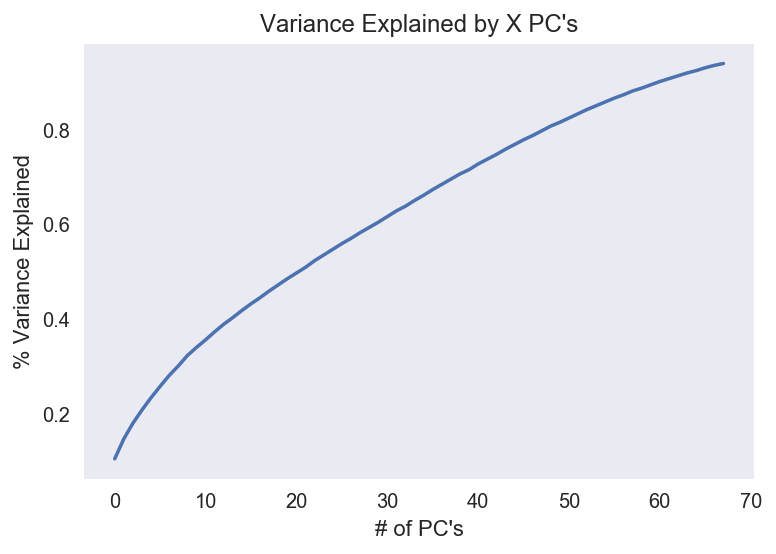

In [3]:
## Feature matrix
X = top_ing_f.values

explained = []
for i in range(2, 70):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X)
    var_sum = np.round(np.sum(pca.explained_variance_ratio_), 3)
    explained.append(var_sum)
    #print("% Total Explained Variance by", i, "PC's:", var_sum)
    
print('\nVariance explained per principal component:\n{}'.format(pca.explained_variance_ratio_))

plt.plot(range(len(explained)), explained)

plt.title("Variance Explained by X PC's")
plt.xlabel("# of PC's")
plt.ylabel("% Variance Explained")
plt.grid()
plt.show()

#### From above the first 5 PC's explaines a decent amount of the variance.

* Below are functions to plot clusters in lower dimensionality

In [4]:
## Creating 2D cluster plot using PCA
def twoD_scatter(x, y, lbls):
    cdict = {0: 'red', 1: 'blue'}

    plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    for g in np.unique(lbls):
        ix = np.where(lbls == g)
        ax.scatter(x[ix], y[ix], c = cdict[g], label = g, s = 30)
    
    ax.legend()
    plt.show()
    

## 3D Scatter Matplot
def threed_scatter(xs, ys, zs, sample=True):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if sample:
        samps = np.random.choice(range(len(xs)), 500, replace=False)
        xs, ys, zs = xs[samps],ys[samps],zs[samps]
    
    ax.scatter(xs,ys,zs)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

    
## Plotly 3D Scatter
def plotly_3d(x, y, z, lbls, sample=True):
    
    if sample:
        samps = np.random.choice(range(len(x)), 700, replace=False)
        x, y, z, lbls = x[samps], y[samps], z[samps], lbls[samps]
    
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=7,
            color=lbls,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )

    data = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='simple-3d-scatter')

## 2D Plots

In [5]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-1).fit(X)
labls = kmeans.labels_

## Take N random samples from X (random customers)
samps = np.random.choice(range(X.shape[0]), 1500, replace=False)

### 1. PCA

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

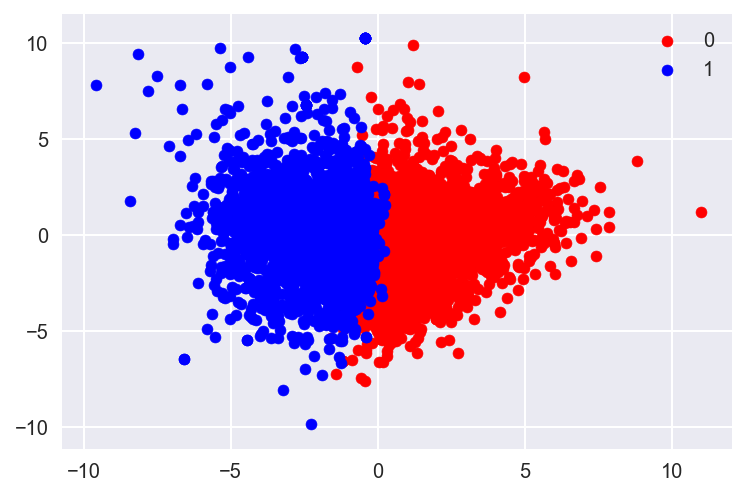

In [7]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]

lbs = labls
twoD_scatter(pca_df.pca1.values, pca_df.pca2.values, lbs)

### 2. tSNE

In [8]:
## Building tSNE object
tsne = TSNE(n_components=2, verbose=True, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(X[samps])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.010s...
[t-SNE] Computed neighbors for 1500 samples in 0.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 2.085200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.878647
[t-SNE] KL divergence after 3000 iterations: 1.993012


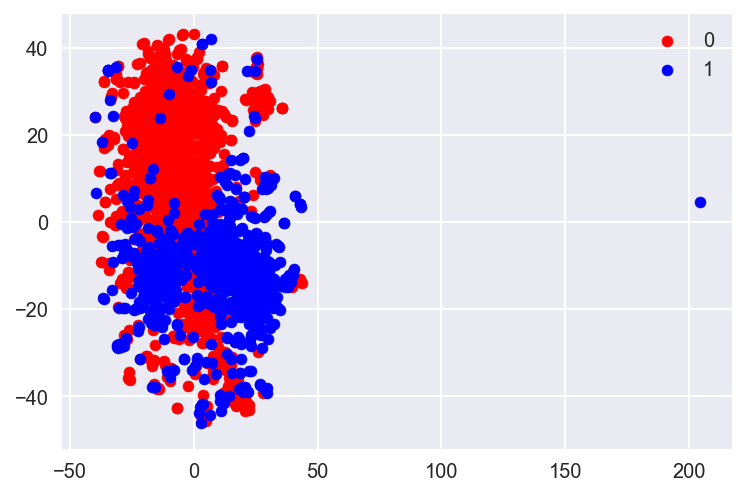

In [9]:
## Formatting data and ploting
tsne_df = pd.DataFrame(columns = ['tsne1','tsne2','tsne3'])

tsne_df['tsne1'] = tsne_results[:,0]
tsne_df['tsne2'] = tsne_results[:,1]

lbs = labls[samps]
twoD_scatter(tsne_df.tsne1.values, tsne_df.tsne2.values, lbs)

## 3D Clustering

In [10]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=3, random_state=0, n_jobs=-1).fit(X)
labls = kmeans.labels_

## Take N random samples from X (random customers)
samps = np.random.choice(range(X.shape[0]), 1200, replace=False)

### 1. PCA

In [11]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

In [12]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]

lbs = labls
plotly_3d(pca_df.pca1.values, pca_df.pca2.values, pca_df.pca3.values, lbs, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~noahschumacher/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### 2. tSNE

In [14]:
tsne = TSNE(n_components=3, verbose=True, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X[samps])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.004s...
[t-SNE] Computed neighbors for 1200 samples in 0.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.118718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 107.697693
[t-SNE] KL divergence after 1000 iterations: 2.460151


In [15]:
tsne_df = pd.DataFrame(columns = ['tsne1','tsne2','tsne3'])

tsne_df['tsne1'] = tsne_results[:,0]
tsne_df['tsne2'] = tsne_results[:,1]
tsne_df['tsne3'] = tsne_results[:,2]

lbs = labls[samps]
plotly_3d(tsne_df.tsne1.values, tsne_df.tsne2.values, tsne_df.tsne3.values, lbs, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~noahschumacher/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
